# 기간별 감성점수 산출
## 일년간 감성점수의 변화를 관찰한다.

In [1]:
import pandas as pd

In [2]:
from pandas import Series,DataFrame

In [4]:
import konlpy

In [5]:
f=pd.read_excel("aron2.xlsx",header=None)

#### *aron2: 'SNS 내용'과 '년월(0000)'로 이루어진 엑셀파일

In [6]:
import konlpy
from konlpy.tag import Kkma
k = Kkma()

In [8]:
sns_list=[]
for i in range(len(f)) :
    sns_list.append(k.pos(str(f.loc[i,0])))

In [9]:
import csv

f2 = open('polarity5.csv', mode='r', encoding = 'cp949')
reader = csv.reader(f2)
d = {}
for line in reader:
    value = line[1]  #리스트로 반환됨
    key = line[0]
    d.update({key:value})
f2.close()

In [10]:
dic_list =[]
for key in d.keys():
        key2 = key.replace('*','').replace(';',' ').replace('/',' ').split()
        key3 = tuple(key2)
        dic_list.append(key3)
        
dic2={}
for z in range(len(dic_list)):
    dic2.update({tuple(dic_list[z]):list(d.values())[z]})

In [11]:
same_list_total=[]
pos_score_list=[]
neg_score_list=[]
neu_score_list=[]
for m in range(len(sns_list)):
    same_list=[]
    pos_score=0
    neg_score=0
    neu_score=0
    for n in range(len(dic_list)):
        if dic_list[n] in sns_list[m]:
            same_list.append(tuple(dic_list[n]))
            if int(list(d.values())[n])==1:
                pos_score+=1
            elif int(list(d.values())[n])==-1:
                neg_score+=1
            else: 
                neu_score+=1
    same_list_total.append(same_list)
    pos_score_list.append(pos_score)
    neg_score_list.append(neg_score)
    neu_score_list.append(neu_score)

In [12]:
data={'context': same_list_total,'pos': pos_score_list, 'neg':neg_score_list, 'neu':neu_score_list} #각 행이 형태소 리스트, 긍정점수, 부정점수, 중립점수로 이루어진 데이터프레임 생성
df=DataFrame(data)
df['date']=list(map(str,f.iloc[:,1])) #date('년월') 열 추가
df.head()

,context,neg,neu,pos,date
0,[],0,0,0,1706
1,"[(늦, VA), (잦, VA), (피로, NNG), (피곤, NNG)]",4,0,0,1707
2,"[(부작용, NNG)]",1,0,0,1804
3,[],0,0,0,1804
4,"[(아프, VA), (건강, NNG)]",1,1,0,1804


In [13]:
df_grouped=df.groupby(df.date).sum() #date 기준 그룹만들고 그룹별 감성점수(긍정, 부정, 중립 각각) 총합 구함

In [14]:
df_grouped.reset_index(level=['date'], inplace = True)

In [15]:
f2=pd.read_excel("aron2.xlsx",header=None)
contents = f2[[1]] #Contents
contents_list = list((contents[1].values))
dic = {}
count = 1
for content in contents_list:
    if content not in dic.keys():(
        dic.update({content:count})
    else :
        dic[content] += 1
#dic은 키가 content(unique한 '년월'들)이고 값이 count(각 '년월'의 빈도수)인 딕셔너리

df_grouped['row']=list(dic.values()) # 각 '년월'의 빈도수로 이루어진 row 열을 데이터프레임에 추가
df_grouped['neg%']=round(df_grouped['neg']/df_grouped['row']*100,1) # 월별 SNS에서 부정어의 언급비율 산출
df_grouped['neu%']=round(df_grouped['neu']/df_grouped['row']*100,1) # 월별 SNS에서 중립어의 언급비율 산출
df_grouped['pos%']=round(df_grouped['pos']/df_grouped['row']*100,1) # 월별 SNS에서 긍정어의 언급비율 산출

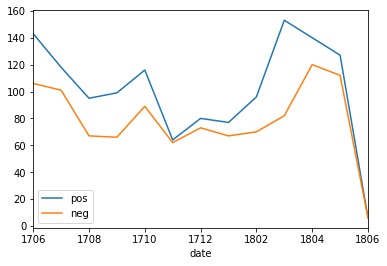

In [17]:
plt=df_grouped.plot.line(x='date',y=['pos','neg']) # 월별 긍정어와 부정어의 언급빈도수 선그래프

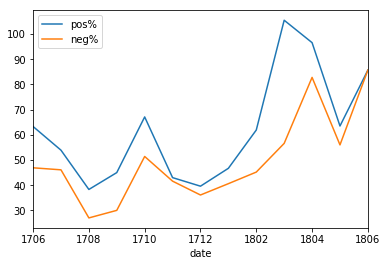

In [18]:
plt=df_grouped.plot.line(x='date',y=['pos%','neg%']) # 월별 긍정어와 부정어의 언급비율 선그래프

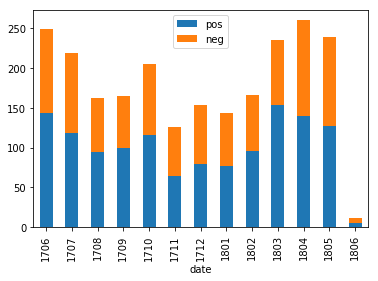

In [27]:
chart=df_grouped.plot.bar(x='date',y=['pos','neg'],stacked=True) # 월별 긍정어와 부정어의 언급빈도수 누적막대그래프
fig = chart.get_figure()
fig.savefig("aron_bar_abs.png")

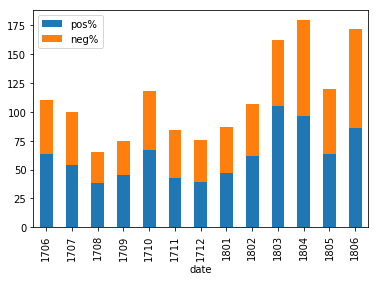

In [45]:
chart2=df_grouped.plot.bar(x='date',y=['pos%','neg%'],stacked=True) # 월별 긍정어와 부정어의 언급비율 누적막대그래프
fig2 = chart2.get_figure()
fig2.savefig("aron_bar_rate.png")

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:784: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  self.book.remove_sheet(self.book.worksheets[0])


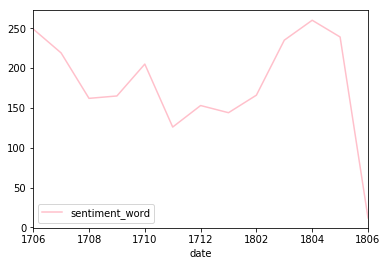

In [46]:
df_grouped['sentiment_word']=df_grouped['pos']+df_grouped['neg']
plt=df_grouped.plot.line(x='date',y='sentiment_word',color='pink') # 월별 (긍정어개수 + 부정어개수)인 총감성어 언급빈도수 선그래프
df_grouped.head()
from pandas import ExcelWriter
from pandas import ExcelFile
writer=ExcelWriter('aron_dataframe.xlsx')
import numpy as np
df_grouped.to_excel(writer,'Sheet1',index=False)
writer.save()

In [21]:
df_grouped['tot']=df_grouped['pos']-df_grouped['neg'] # 월별 (긍정어수 - 부정어수)인 감성점수 열 추가

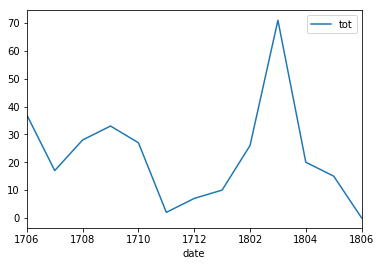

In [22]:
df_grouped.plot(x='date',y='tot') #감성점수 선 그래프

In [1]:
sent_score_chart=df_grouped.plot.bar(x='date',y='tot',color='tab:purple') #감성점수 막대 그래프
fig = sent_score_chart.get_figure()
fig.savefig("aron_bar_score.png")

NameError: name 'df_grouped' is not defined